In [1]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path
import arch as arch

%matplotlib inline

In [2]:
#Other Imports 
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
#file_path = Path('PrivateEquityReturns.csv')
#pe_df = pd.read_csv(file_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
#pe_df

In [4]:
file_path = Path('PrivateEquityReturnsFinal.csv')
pe_df = pd.read_csv(file_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
pe_df

,Index,Quarter,Private Equity Returns,Cumulative,100,Unnamed: 6,Unnamed: 7
Date,,,,,,,
1986-06-30,1986 Q2,Q2,4.22,104.22,104.22,NaN,NaN
1986-09-30,1986 Q3,Q3,-2.60,101.62,101.62,NaN,NaN
1986-12-31,1986 Q4,Q4,1.11,102.73,102.73,NaN,NaN
1987-03-31,1987 Q1,Q1,3.73,106.46,106.46,NaN,NaN
1987-06-30,1987 Q2,Q2,1.28,107.74,107.74,NaN,NaN
...,...,...,...,...,...,...,...
2018-09-30,2018 Q3,Q3,3.84,532.50,532.50,NaN,NaN
2018-12-31,2018 Q4,Q4,-1.95,530.55,530.55,NaN,NaN
2019-03-31,2019 Q1,Q1,4.89,535.44,535.44,NaN,NaN


In [5]:
#pe_df = pe_df.drop(columns=['Index','Quarter','100','Unnamed: 6','Unnamed: 7'])
pe_df['Private Equity Returns'] = pe_df['Private Equity Returns']/100

In [10]:
pe_df['Private Equity Returns']

Date
1986-06-30    0.0422
1986-09-30   -0.0260
1986-12-31    0.0111
1987-03-31    0.0373
1987-06-30    0.0128
               ...  
2018-09-30    0.0384
2018-12-31   -0.0195
2019-03-31    0.0489
2019-06-30    0.0342
2019-09-30    0.0131
Name: Private Equity Returns, Length: 134, dtype: float64

In [6]:
scaled_returns

NameError: name 'scaled_returns' is not defined

In [11]:
pe_test = pe_df.dropna()


In [12]:
pe_df['pe_returns'] = pe_df['Private Equity Returns']

In [9]:
pd.DataFrame(scaled_returns).hist()

NameError: name 'scaled_returns' is not defined

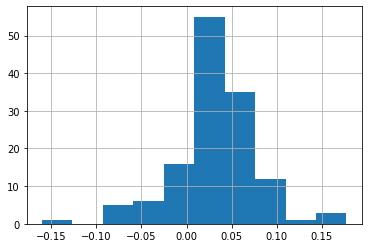

In [13]:
pe_df.pe_returns.hist()

In [145]:
#pe_df = pe_df.dropna()
#pe_df

In [ ]:
#pe_2_df = pe_df.set_index(['Date'])
#pe_2_df

In [ ]:
#pe_final = pe_df['Private Equity Returns'].copy()
#pe_final#

In [ ]:
#pe_final = pd.DataFrame(columns=['Date','Private Equity Returns'])
#pe_final

In [ ]:
#pe_final = pe_final.drop([134])
#pe_final

In [ ]:
#pe_final = pe_final.set_index('Date')
#pe_final

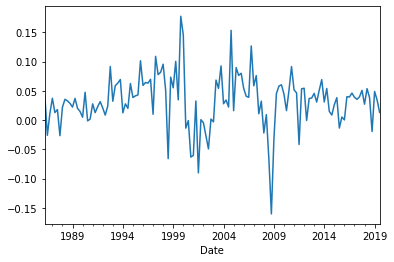

In [14]:
pe_df['Private Equity Returns'].plot()

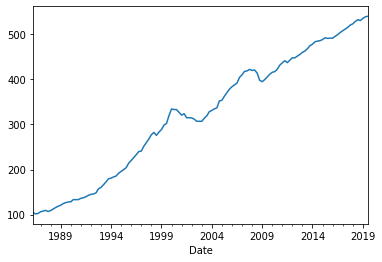

In [15]:
pe_df['Cumulative'].plot()

In [16]:
pe_df = df.asfreq('Q-DEC')

NameError: name 'df' is not defined

In [17]:
pd.infer_freq(pe_df.index)

'Q-DEC'

In [151]:
from arch import arch_model

In [253]:
# 'p' and 'q'  are akin to the 'p' and 'q' of an ARMA model.
# 'vol="GARCH"' means that we're using a GARCH model.
# The 'mean="Zero"' means that we're estimating a GARCH.
model = arch_model(pe_df.pe_returns, mean="Zero", vol="Garch", p=3, q=3)

In [254]:
# Fit the GARCH Model
res = model.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: -205.53629045292178
Iteration:      2,   Func. Count:     23,   Neg. LLF: -205.74282786479495
Iteration:      3,   Func. Count:     34,   Neg. LLF: -205.8672544456245
Iteration:      4,   Func. Count:     45,   Neg. LLF: -205.95218631263708
Iteration:      5,   Func. Count:     55,   Neg. LLF: -206.01854080389734
Iteration:      6,   Func. Count:     65,   Neg. LLF: -206.2277626362374
Iteration:      7,   Func. Count:     74,   Neg. LLF: -206.49834186822937
Iteration:      8,   Func. Count:     83,   Neg. LLF: -208.21176600921683
Iteration:      9,   Func. Count:     93,   Neg. LLF: -208.23687559175437
Iteration:     10,   Func. Count:    105,   Neg. LLF: -208.2472397610766
Iteration:     11,   Func. Count:    115,   Neg. LLF: -208.28375471973192
Iteration:     12,   Func. Count:    126,   Neg. LLF: -208.2883510613135
Iteration:     13,   Func. Count:    136,   Neg. LLF: -208.29176239960165
Iteration:     14,   Func. Count:    146, 

/Users/PeterRepetto/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001991. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


In [18]:
import statsmodels.api as sm

In [19]:
ts_noise, ts_trend = sm.tsa.filters.hpfilter(pe_df.pe_returns)

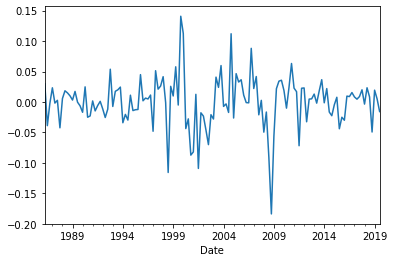

In [20]:
ts_noise.plot()

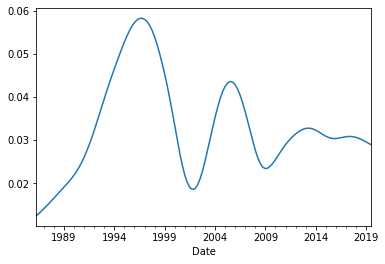

In [21]:
ts_trend.plot()

In [22]:
fit.

SyntaxError: invalid syntax (<ipython-input-22-227f6453c3bc>, line 1)

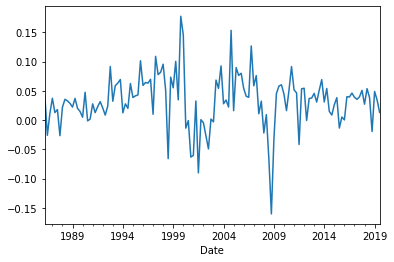

In [23]:
pe_df.pe_returns.plot()

In [24]:
# Summarize the model results
res.summary()

NameError: name 'res' is not defined

In [25]:
# Plot the model estimate of annualized volatility
fig = res.plot()

NameError: name 'res' is not defined

In [245]:
# Construct Volatility Forecasts for the next 3 days
forecast_horizon = 3
# Take the last day of the data we used above. 
# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
forecasts = res.forecast(start='2019-06-30', horizon=forecast_horizon)
forecasts.mean

ValueError: date_index must be a datetime64 array

In [229]:
pe_df.tail()

,Private Equity Returns,Cumulative,pe_returns
Date,,,
2018-09-30,0.0384,532.50,0.0384
2018-12-31,-0.0195,530.55,-0.0195
2019-03-31,0.0489,535.44,0.0489
2019-06-30,0.0342,538.86,0.0342
2019-09-30,0.0131,540.17,0.0131


In [126]:
pe_df.tail()

,Private Equity Returns,Cumulative
Date,,
2018-09-30,3.84,532.50
2018-12-31,-1.95,530.55
2019-03-31,4.89,535.44
2019-06-30,3.42,538.86
2019-09-30,1.31,540.17


In [171]:
forecasts = res.forecast(start='2019-12-01', horizon=3)

In [172]:
forecasts.variance

,h.1,h.2,h.3
Date,,,
1986-06-30,NaN,NaN,NaN
1986-09-30,NaN,NaN,NaN
1986-12-31,NaN,NaN,NaN
1987-03-31,NaN,NaN,NaN
1987-06-30,NaN,NaN,NaN
...,...,...,...
2018-09-30,NaN,NaN,NaN
2018-12-31,NaN,NaN,NaN
2019-03-31,NaN,NaN,NaN


In [169]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 12)
intermediate

,h.1,h.2,h.3
Date,,,


In [109]:
# The name of the column here is the date of the forecast.
# Each row represents the forecast of volatility for the following days.
# Transposing makes the forecast easier to plot
final = intermediate.dropna().T
final

Date
h.1
h.2
h.3


In [ ]:
final.plot()